In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

In [4]:
df = pd.read_csv(r'teste_indicium_precificacao.csv')

In [5]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [7]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Removendo colunas não significativas

In [8]:
df.drop(['id','ultima_review', 'host_name'], axis=1, inplace=True)
df.head(3)

,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
2,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [9]:
df.fillna({'reviews_por_mes':0}, inplace=True) # Coloca zero nas reviews NA.

In [10]:
df.isnull().sum()

nome                             16
host_id                           0
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

In [11]:
df.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
len(df.bairro.unique())

221

In [13]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64

Conta a quantidade de Airbnbs cada host tem

In [14]:
df['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

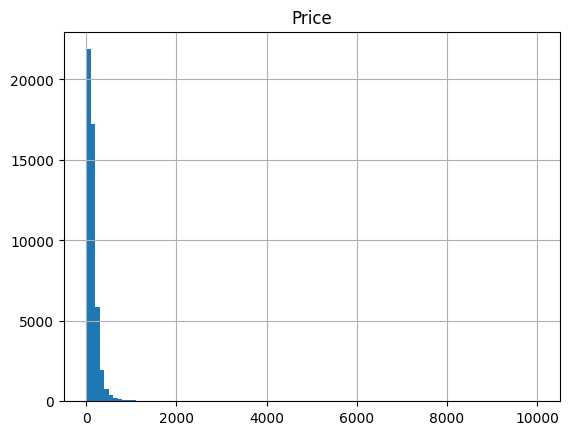

In [15]:
ax = df['price'].hist(bins=100)
ax.set_title('Price')

plt.show()

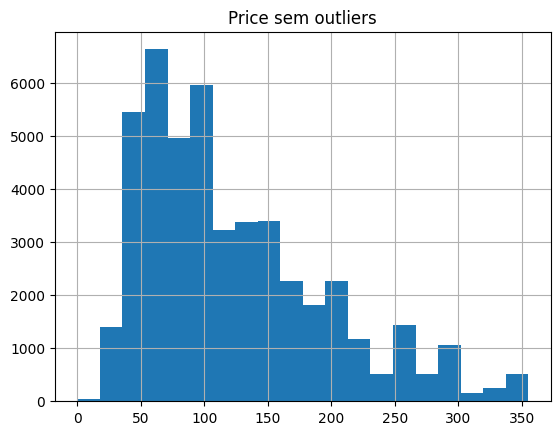

In [16]:
ax = df[df['price'] <= df['price'].quantile(0.95)]['price'].hist(bins=20)
ax.set_title('Price sem outliers')

plt.show()


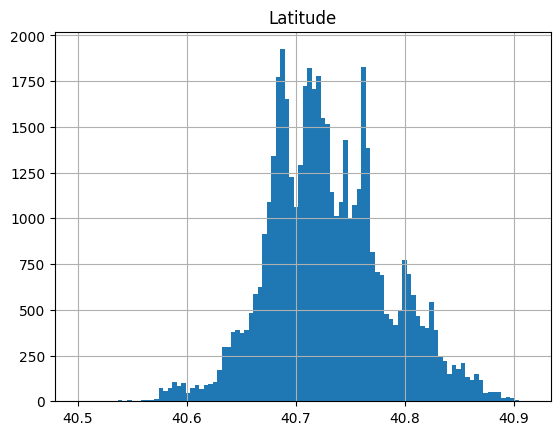

In [17]:
ax = df['latitude'].hist(bins=100)
ax.set_title('Latitude')

plt.show()

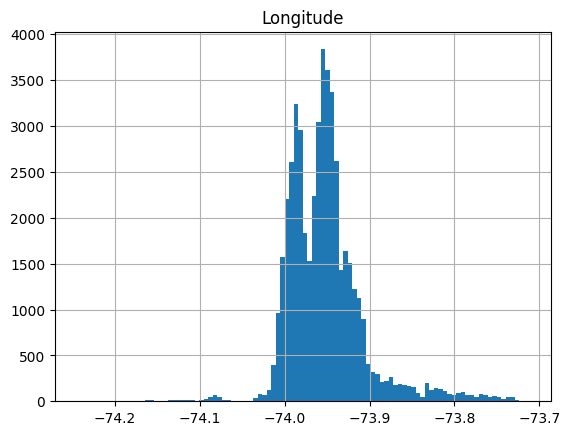

In [18]:
ax = df['longitude'].hist(bins=100)
ax.set_title('Longitude')

plt.show()

In [19]:
df['minimo_noites'].sort_values(ascending=False)[0:30]

5766     1250
2853     1000
26340     999
38663     999
13403     999
11192     500
47619     500
8013      500
7354      500
14284     500
10828     480
34486     400
1304      370
15945     366
48445     365
4436      365
4371      365
13885     365
5384      365
7327      365
31729     365
20095     365
3397      365
17337     365
39874     365
19793     365
13787     365
1448      365
17810     365
4793      365
Name: minimo_noites, dtype: int64

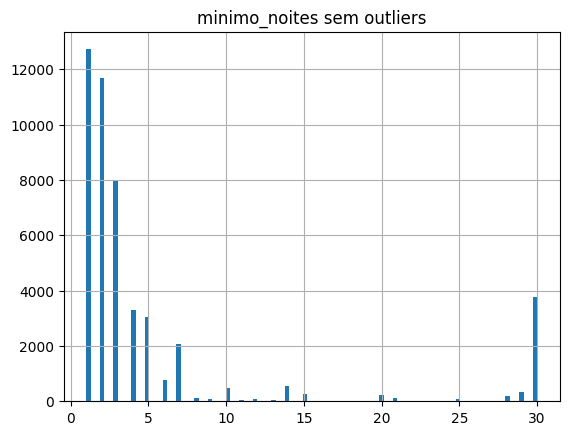

In [20]:
ax = df[df['minimo_noites'] <= df['minimo_noites'].quantile(0.95)]['minimo_noites'].hist(bins=100)
ax.set_title('minimo_noites sem outliers')

plt.show()

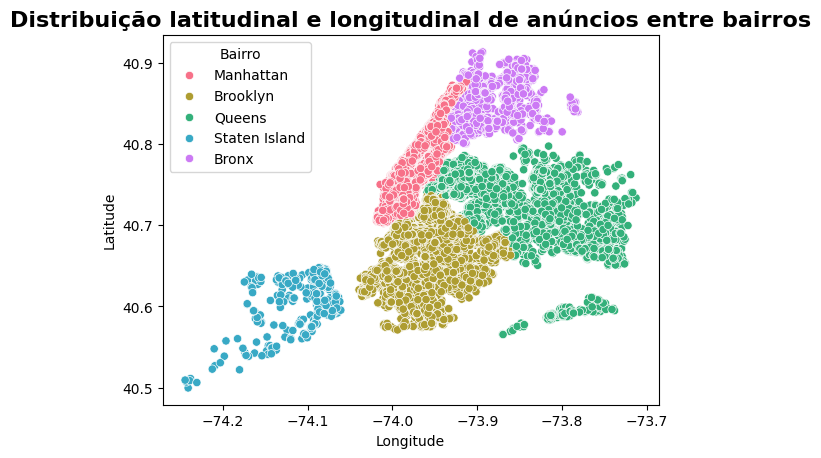

In [21]:
lat = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.bairro_group, palette="husl")

lat.set_title('Distribuição latitudinal e longitudinal de anúncios entre bairros', weight='bold', fontsize = 16)
lat.set_xlabel('Longitude')
lat.set_ylabel('Latitude')
lat.legend(loc='upper left', title='Bairro')

Text(0, 0.5, 'No. de propiedades')

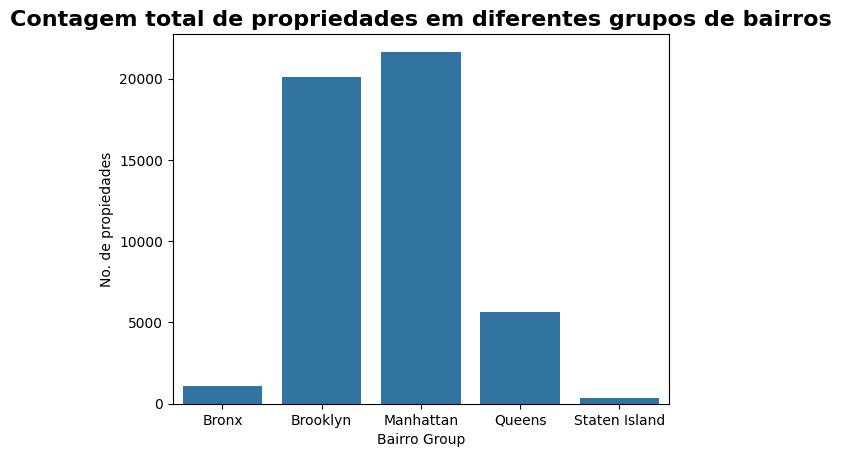

In [22]:
listing_per_bairro_group=df.groupby(['bairro_group']).agg({'calculado_host_listings_count': 'count'}, group_keys=False ,as_index=False)
listing_per_bairro_group.columns = ['total_property_count']
x = listing_per_bairro_group.index
y = listing_per_bairro_group['total_property_count']
ar = sns.barplot(x=x, y = y, data = listing_per_bairro_group)
ar.set_title("Contagem total de propriedades em diferentes grupos de bairros", fontsize = 16 , weight = 'bold')
ar.set_xlabel('Bairro Group')
ar.set_ylabel('No. de propiedades')

Bairro com maior listagem é o Williamsburg, Brooklyn.     

In [23]:
df['bairro'].value_counts()

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [24]:
df['bairro_group'].value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

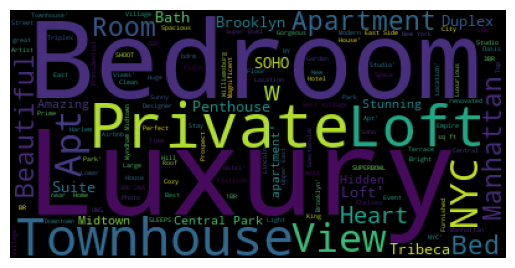

In [26]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
price_teste = df[df['price'] >= df['price'].quantile(0.99)]

text = price_teste['nome'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Correlação entre as variáveis

<Axes: >

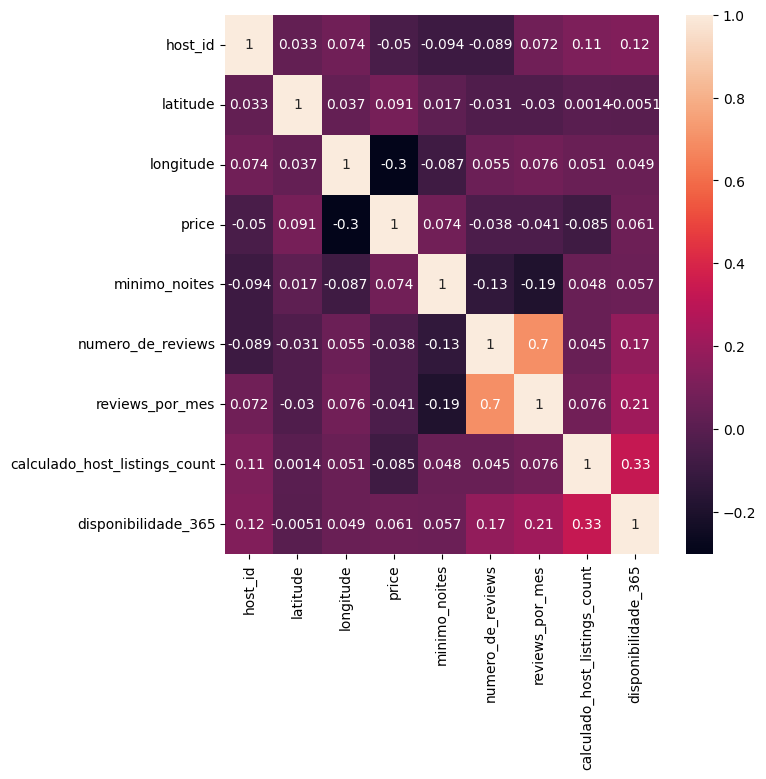

In [27]:
corr = df[['host_id','latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews',
       'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']].corr(method='kendall')
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'No. de propiedades')

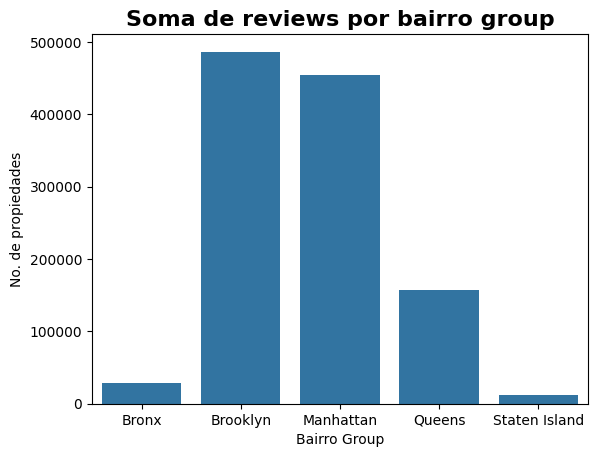

In [28]:
reviews_per_bairro_group=df.groupby(['bairro_group']).agg({'numero_de_reviews': ['sum']})
reviews_per_bairro_group.columns = ['contagem_reviews']
reviews_per_bairro_group = reviews_per_bairro_group.reset_index()
x = reviews_per_bairro_group['bairro_group']
y = reviews_per_bairro_group['contagem_reviews']
ar = sns.barplot(x=x, y = y, data = reviews_per_bairro_group)
ar.set_title("Soma de reviews por bairro group", fontsize = 16 , weight = 'bold')
ar.set_xlabel('Bairro Group')
ar.set_ylabel('No. de propiedades')

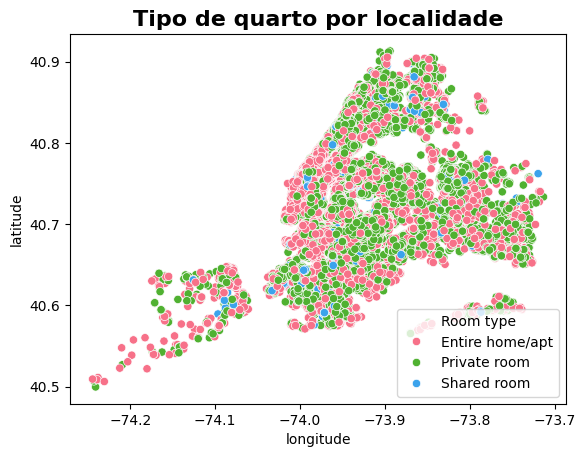

In [29]:
rm = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette="husl")
rm.set_title('Tipo de quarto por localidade', weight='bold', fontsize = 16)
rm.legend(loc='lower right', title='Room type')

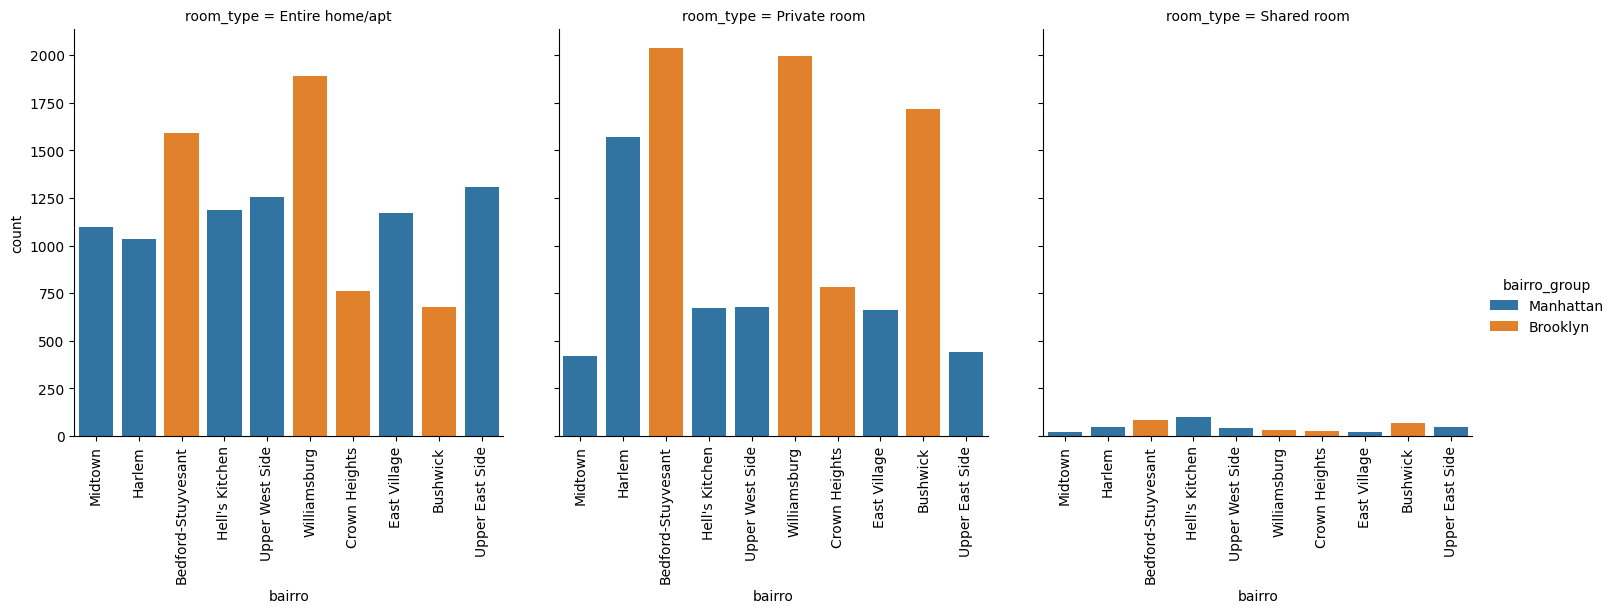

In [30]:
top_neighours=df.loc[df['bairro'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
s = sns.catplot(data = top_neighours, x='bairro', hue='bairro_group', col='room_type', kind='count')
s.set_xticklabels(rotation=90)

Airbnbs com preços menores têm uma tendência de terem mais reviews.

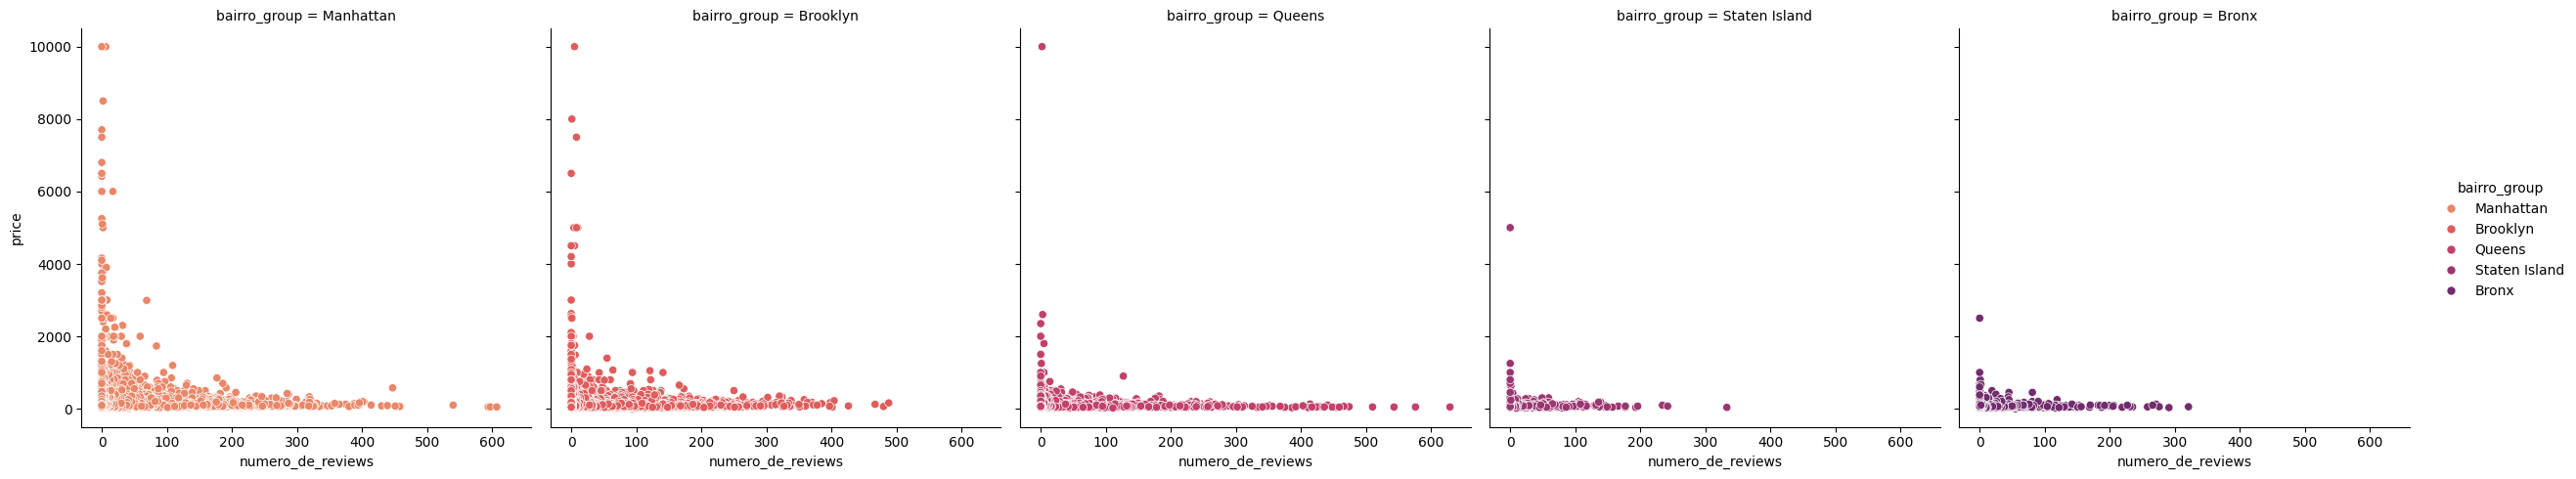

In [31]:
sns.relplot(x=df.numero_de_reviews, y=df.price, hue=df.bairro_group, col=df.bairro_group, palette="flare")

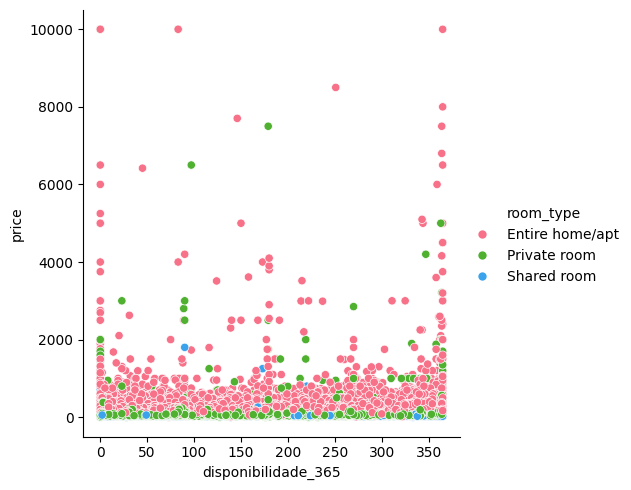

In [32]:
sns.relplot(x=df.disponibilidade_365, y=df.price, hue=df.room_type, palette="husl")

C:\Users\Mateus\AppData\Local\Temp\ipykernel_6172\919931259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pv = sns.boxenplot(x='bairro_group', y='price', data= rev_price , palette = 'magma')


Text(0.5, 0, 'Bairros Group')

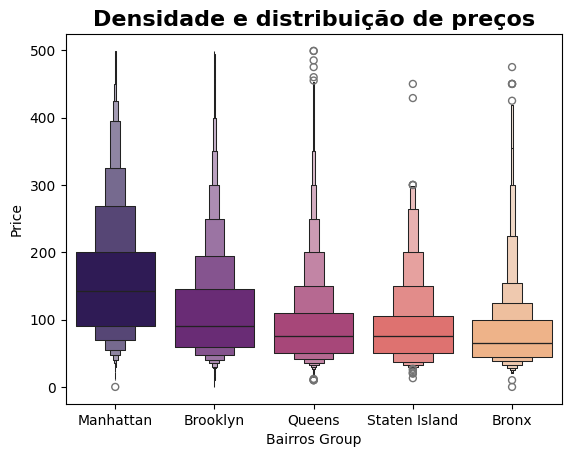

In [33]:
rev_price = df[df.price  < 500] # preço menos que 500
pv = sns.boxenplot(x='bairro_group', y='price', data= rev_price , palette = 'magma')
pv.set_title('Densidade e distribuição de preços', weight='bold', fontsize = 16)
pv.set_ylabel('Price')
pv.set_xlabel('Bairros Group')

Regressão Linear Multipla

In [34]:
# Removendo os outliers do preço e do minimo de noites
df = df[df['price'] <= df['price'].quantile(0.95)]
df = df[df['minimo_noites'] <= df['minimo_noites'].quantile(0.95)]

In [35]:
# Removendo colunas desnecessárias
df.drop(['host_id', 'longitude', 'latitude','bairro','numero_de_reviews','reviews_por_mes'], axis = 1, inplace = True)
X = df.drop(['price', 'nome'],axis=1).copy()
y = df['price']

In [36]:
#encoding
X = pd.get_dummies(X, prefix=['bairro_group', 'room_type'], drop_first=True)

In [37]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [38]:
#Normalizando valores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

R2 score:  45.496310050713674
RMSE:  52.81799605915179
   Actual Values  Predicted Values
0            115        106.703380
1             89         65.954654
2            180        177.370740
3             46         34.114450
4            165        180.037571


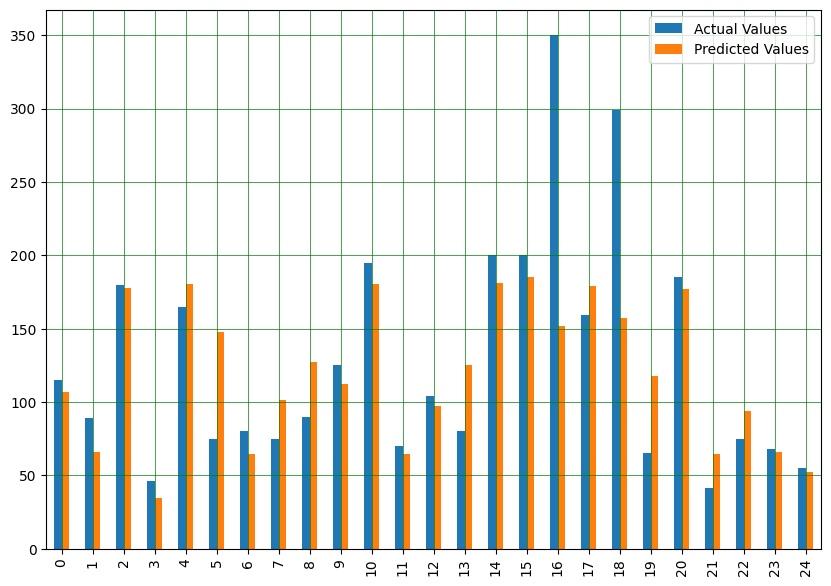

In [39]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
#R2 score
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [40]:
X.columns

Index(['minimo_noites', 'calculado_host_listings_count', 'disponibilidade_365',
       'bairro_group_Brooklyn', 'bairro_group_Manhattan',
       'bairro_group_Queens', 'bairro_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [41]:
example = {'id': 2595,
'nome': 'Skylit Midtown Castle',
'host_id': 2845,
'host_name': 'Jennifer',
'bairro_group': 'Manhattan',
'bairro': 'Midtown',
'latitude': 40.75362,
'longitude': -73.98377,
'room_type': 'Entire home/apt',
'price': 225,
'minimo_noites': 1,
'numero_de_reviews': 45,
'ultima_review': '2019-05-21',
'reviews_por_mes': 0.38,
'calculado_host_listings_count': 2,
'disponibilidade_365': 355}


In [42]:
example_formato_modelo = {'minimo_noites':1, 'calculado_host_listings_count':2,
       'disponibilidade_365':365, 'bairro_group_Brooklyn':False,
       'bairro_group_Manhattan':True, 'bairro_group_Queens':False,
       'bairro_group_Staten Island':False, 'room_type_Private room':True,
       'room_type_Shared room':False}

In [43]:
x_test = pd.DataFrame([example_formato_modelo])

In [44]:
x_test = scaler.fit_transform(x_test)
y_pred=reg.predict(x_test)
y_pred

array([122.41310168])

In [45]:
with open("modelo.pkl", "wb") as f:
    pickle.dump(reg, f)